In [1]:
# hand gestures recognition
import cv2
import math
camera = cv2.VideoCapture(0)
cv2.namedWindow("threshold value adjust")
cv2.resizeWindow("threshold value adjust",640,240)
def empty(n):
    pass
cv2.createTrackbar("threshold","threshold value adjust",150,255,empty)
while True:
    ret , frame = camera.read()
    
    frame = cv2.flip(frame,1)
    cv2.rectangle(frame,(100,100),(300,300),(0,255,0),2)
    roi = frame[100:300,100:300]
    hand = roi.copy()
    gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(9,9),0)
    thresh_value = cv2.getTrackbarPos("threshold","threshold value adjust")
    _,thresh = cv2.threshold(blur,thresh_value,255,cv2.THRESH_BINARY)
    _,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    try:
        contour = max(contours, key=lambda x: cv2.contourArea(x))
        hull = [cv2.convexHull(c) for c in contours]
        cv2.drawContours(hand,hull,-1,(0,255,0),2)
        hull = cv2.convexHull(contour, returnPoints=False)
        defects = cv2.convexityDefects(contour , hull)
        count_defects = 0
  
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])

            a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = (math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 180) / 3.14

            # if angle > 90 draw a circle at the far point
            if angle <= 90:
                count_defects += 1
                cv2.circle(hand, far, 1, [0, 0, 255], -1)

            cv2.line(hand, start, end, [0, 255, 0], 2)

        # Print number of fingers
        if count_defects == 0:
            cv2.putText(frame, "1", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255),2)
        elif count_defects == 1:
            cv2.putText(frame, "2", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255), 2)
        elif count_defects == 2:
            cv2.putText(frame, "3", (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255), 2)
        elif count_defects == 3:
            cv2.putText(frame, "4", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255), 2)
        elif count_defects == 4:
            cv2.putText(frame, "5", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,255), 2)
        else:
            pass
    except:
        pass
    cv2.imshow("frame",frame)
    cv2.imshow("thresshold",thresh)
    cv2.imshow("hand",hand)
    if cv2.waitKey(100) & 0xFF == 27:
        break
camera.release()
cv2.destroyAllWindows()

[[[    0   125    19 17593]]

 [[  125   131   128   433]]

 [[  131   135   134   243]]

 [[  135   141   138   721]]

 [[  141   143   142   114]]

 [[  143   168   154  2903]]

 [[  168   170   169   240]]

 [[  170   172   171   244]]

 [[  173   175   174   249]]

 [[  175   177   176   240]]

 [[  177   179   178   232]]

 [[  179   181   180   229]]

 [[  181   185   182   229]]

 [[  186   198   193  1006]]

 [[  198   224   217  2256]]

 [[  224   245   230  2576]]

 [[  245   321   268  5001]]]


Text(0.5,1,'new image')

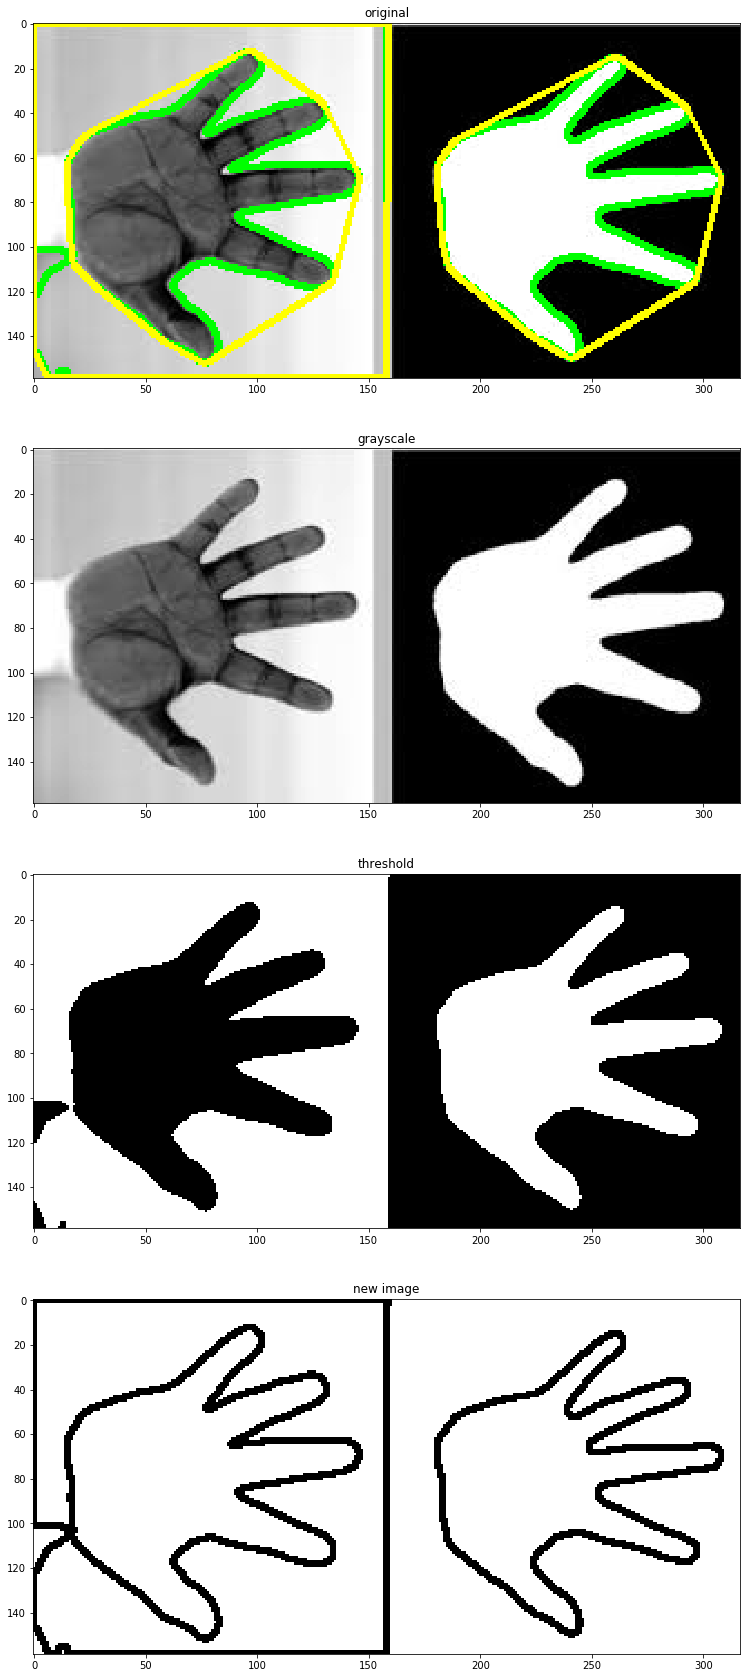

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("download.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
_,thresh = cv2.threshold(blur,180,255,cv2.THRESH_BINARY)
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=lambda x: cv2.contourArea(x))
hull = [cv2.convexHull(c) for c in contours]

new_img = np.ones(np.shape(thresh))
cv2.drawContours(new_img,contours,-1,(0,255,0),2)
cv2.drawContours(image,contours,-1,(0,255,0),2)
cv2.drawContours(image,hull,-1,(255,255,0),2)
try:
    defects = cv2.convexityDefects(contour,hull)
except:
    pass

fig = plt.figure(figsize=(30,30))

fig.add_subplot(4,1,1)
plt.title("original")
plt.imshow(image)
plt.title("original")

fig.add_subplot(4,1,2)
plt.imshow(gray,cmap = 'gray')
plt.title("grayscale")

fig.add_subplot(4,1,3)
plt.imshow(thresh , cmap = 'gray')
plt.title("threshold")

fig.add_subplot(4,1,4)
plt.imshow(new_img , cmap = 'gray')
plt.title("new image")


In [2]:
import cv2
import math
import numpy as np

camera = cv2.VideoCapture(0)

def h(n):
    pass
cv2.namedWindow("threshold parameter")
cv2.resizeWindow("threshold parameter",640,240)
cv2.createTrackbar("threshold","threshold parameter",150,255,h)

while True:
    ret,frame = camera.read()
    frame = cv2.flip(frame,1)
    roi  = frame[100:300,100:300]
    hand = roi.copy()
    cv2.rectangle(frame,(100,100),(300,300),(0,255,0),2)
    roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(roi_gray,(9,9),0)
    value = cv2.getTrackbarPos("threshold","threshold parameter")
    _,thresh = cv2.threshold(blur,value,255,cv2.THRESH_BINARY)
    _,contours,_ =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    try:
        contour = max(contours, key=lambda x: cv2.contourArea(x))
        hull = [cv2.convexHull(c) for c in contours]
        cv2.drawContours(hand,hull,-1,(0,255,0),2)
        hull = cv2.convexHull(contour, returnPoints=False)
        defects = cv2.convexityDefects(contour , hull)
        count_defects = 0
  
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])

            a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = (math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 180) / 3.14

            # if angle > 90 draw a circle at the far point
            if angle <= 90:
                count_defects += 1
                cv2.circle(hand, far, 1, [0, 0, 255], 3)

            cv2.line(hand, start, end, [0, 255, 0], 2)
        if count_defects == 0:
            cv2.putText(frame,"1",(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        elif count_defects == 1:
            cv2.putText(frame,"2",(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        elif count_defects == 2:
            cv2.putText(frame,"3",(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        elif count_defects == 3:
            cv2.putText(frame,"4",(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        elif count_defects == 4:
            cv2.putText(frame,"5",(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        else:
            pass
    except:
        pass
    cv2.imshow("thresh",thresh)
    cv2.imshow("frame",frame)
    cv2.imshow("hand",hand)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
camera.release()
cv2.destroyAllWindows()